Ciclo Crisis 52-55 ignorado (fuera de rango)
Ciclo Expansión 56-69 ignorado (fuera de rango)
Ciclo Recesión 70-81 ignorado (fuera de rango)
Ciclo Crisis 82-84 ignorado (fuera de rango)


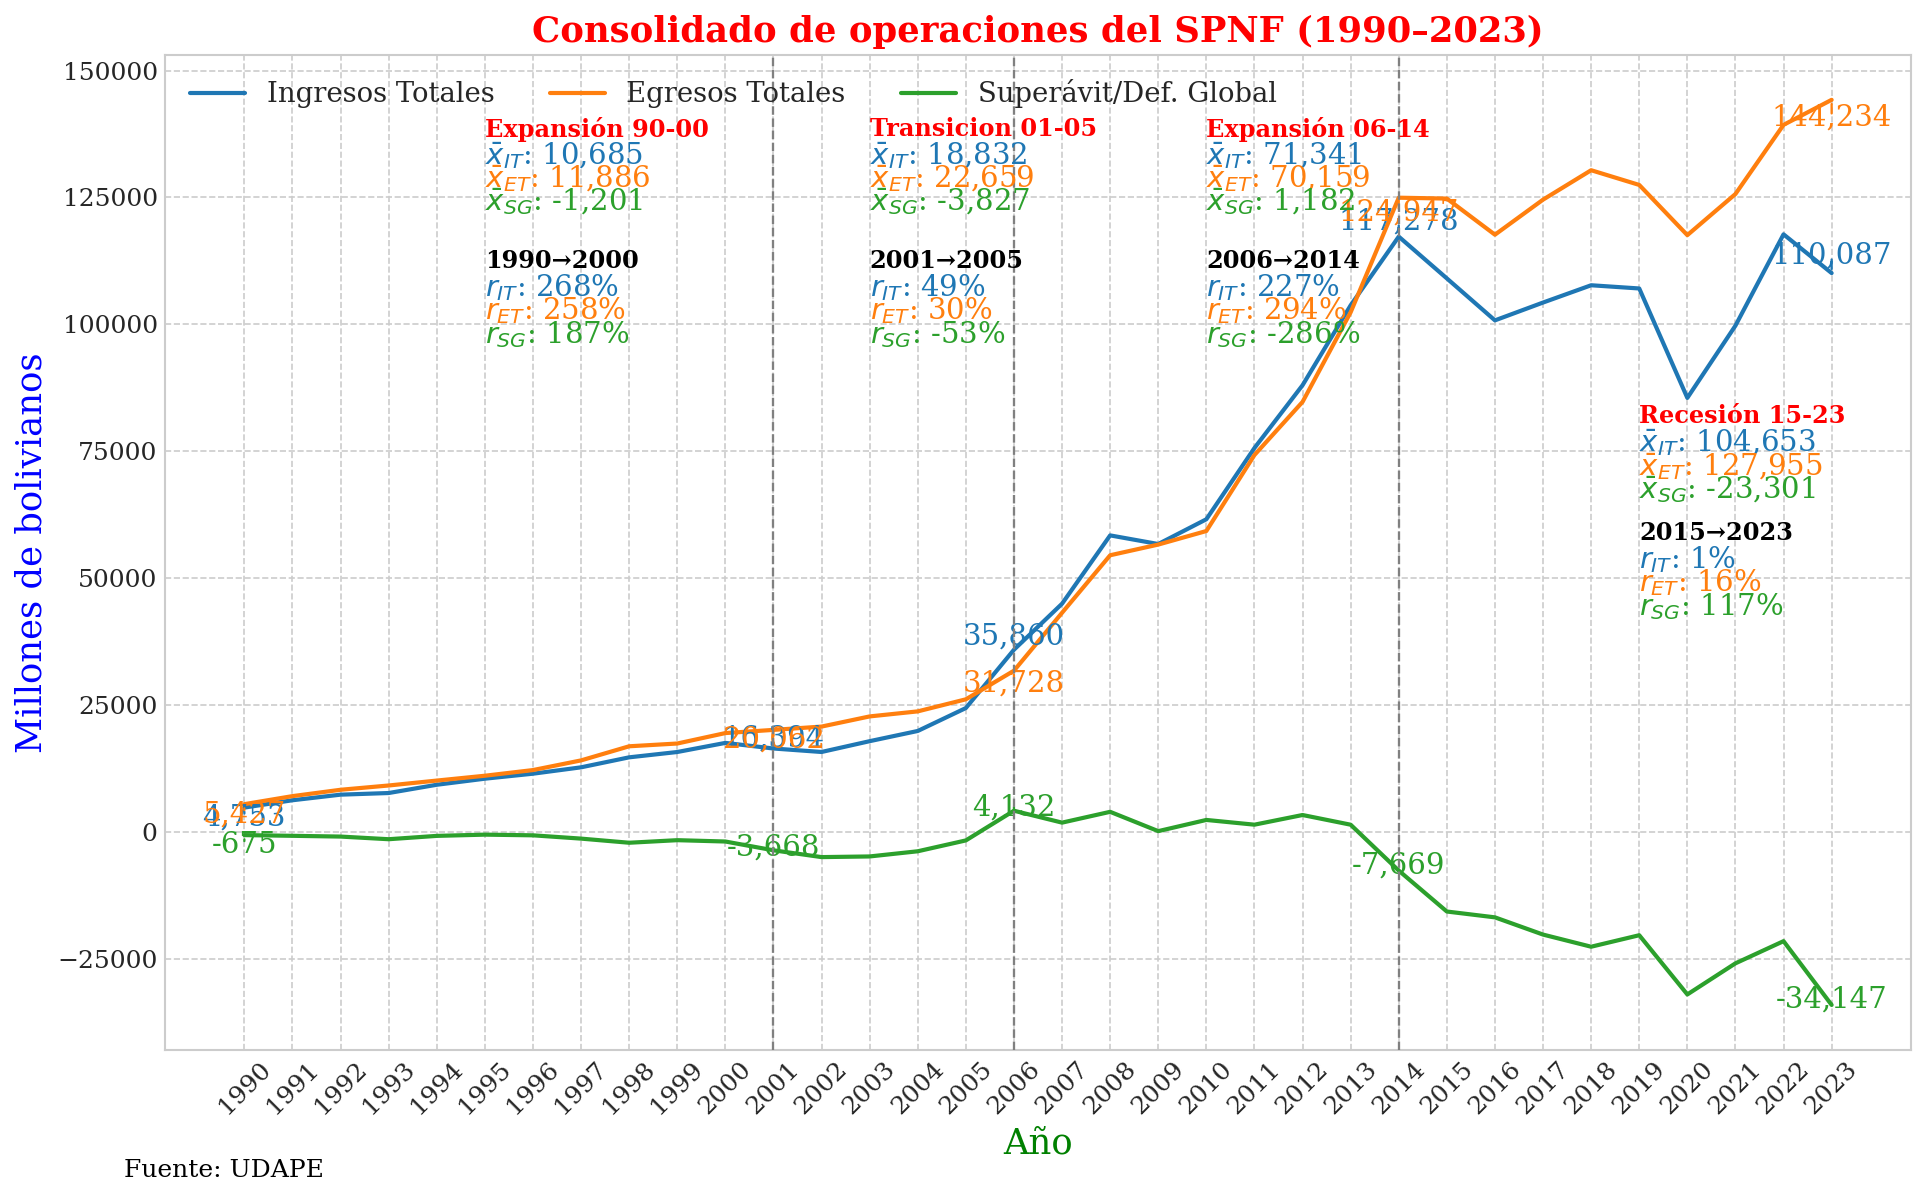

In [1]:
# scripts/tesis/serie_completa/consolidado_spnf.py

import os
import sys
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# añadir ruta a utilidades propias
sys.path.append(os.path.abspath('../'))
from graficos_utils import *
from config import *

# ── 1. Imports y Configuración Global ─────────────────────────────────────────
# Directorio de salida
output_dir = "../../../../assets/tesis/serie_completa/consolidado_spnf"
os.makedirs(output_dir, exist_ok=True)

# Estilo global
set_style()

# ── 2. Carga de Datos ─────────────────────────────────────────────────────────
with sqlite3.connect('../../../../db/proyectomacro.db') as conn:
    df = (
        pd.read_sql(
            "SELECT * FROM consolidado_spnf",
            conn,
            index_col='año'
        )
        .sort_index()
    )

# ── 3. Definición de componentes y Abreviaturas ───────────────────────────────
componentes = [
    ("ingresos_totales",   "Ingresos Totales"),
    ("egresos_totales",    "Egresos Totales"),
    ("sup_o_def_global",   "Superávit/Def. Global"),
]
cols_componentes = [col for col, _ in componentes]

abbr = {
    "ingresos_totales":   "IT",
    "egresos_totales":    "ET",
    "sup_o_def_global":   "SG",
}

colors = {
    "ingresos_totales":   "#1f77b4",
    "egresos_totales":    "#ff7f0e",
    "sup_o_def_global":   "#2ca02c",
}

# ── 4. Preparación de Anotaciones y Ciclos ────────────────────────────────────
annot_years  = adjust_annot_years(df, annot_years)
cycles       = adjust_cycles(df, CYCLES)
cycle_stats  = {
    name: df.loc[period, cols_componentes].mean().to_dict()
    for name, period in cycles.items()
}
periodos     = adjust_periods(df, periodos_tasas)

# ── 5. Offsets y Posicionamientos ─────────────────────────────────────────────
annotation_offsets = {
    "ingresos_totales": {
        1990:(0, -2000),
        2001: (0, 2000),
        2006: (0, 2500),
        2014: (0, 3000),
        2023: (0, 3500),
    },
    "egresos_totales": {
        1990:(0, -2000),
        2001: (0, -2000),
        2006: (0, -2500),
        2014: (0, -3000),
        2023: (0, -3500),
    },
    "sup_o_def_global": {
        1990:(0, -2000),
        2001: (0,  500),
        2006: (0,  700),
        2014: (0,  900),
        2023: (0, 1100),
    },
}
# hitos verticales (solo los años ≥1990 presentes en hitos_v)
hitos_offsets = {
    2001: 0.8,
    2006: 0.8,
    2014: 0.8,
}

# Mean‐value annotation offsets (cycles)
medias_offsets = {
    "Expansión 90-00":    ( (1990 + 2000)/2, 0.92 ),  # → (1995, 0.92)
    "Transicion 01-05":   ( (2001 + 2005)/2, 0.92 ),  # → (2003, 0.92)
    "Expansión 06-14":    ( (2006 + 2014)/2, 0.92 ),  # → (2010, 0.92)
    "Recesión 15-23":     ( (2015 + 2023)/2, 0.55 ),  # → (2019, 0.92)
}

tasas_offsets = {
    "1990-2000":          ( (1990 + 2000)/2, 0.75 ),  # → (1995, 0.87)
    "2001-2005":          ( (2001 + 2005)/2, 0.75 ),  # → (2003, 0.87)
    "2006-2014":          ( (2006 + 2014)/2, 0.75 ),  # → (2010, 0.87)
    "2015-2023":          ( (2015 + 2023)/2, 0.40 ),  # → (2019, 0.87)
}

# ── 6. Generación de la Gráfica ───────────────────────────────────────────────
fig, ax = init_base_plot(
    df=df,
    series=componentes,
    colors=colors,
    title=f"Consolidado de operaciones del SPNF ({df.index[0]}–{df.index[-1]})",
    xlabel="Año",
    ylabel="Millones de bolivianos",
    source_text="Fuente: UDAPE"
)

add_hitos(
    ax,
    df.index,
    hitos_v,
    hitos_offsets
)

add_year_value_annotations(
    ax,
    df,
    annot_years,
    cols_componentes,
    annotation_offsets,
    colors
)

add_cycle_means_multi(
    ax,
    cycle_stats,
    medias_offsets,
    abbr,
    colors,
    line_spacing=ax.get_ylim()[1] * 0.03
)

add_period_growth_annotations_multi(
    ax,
    df,
    periodos,
    cols_componentes,
    tasas_offsets,
    colors,
    abbr
)


plt.savefig(os.path.join(output_dir, "consolidado_spnf.png"))
plt.show()


Ciclo Intervensionismo-estatal 52-84 ignorado (fuera de rango)


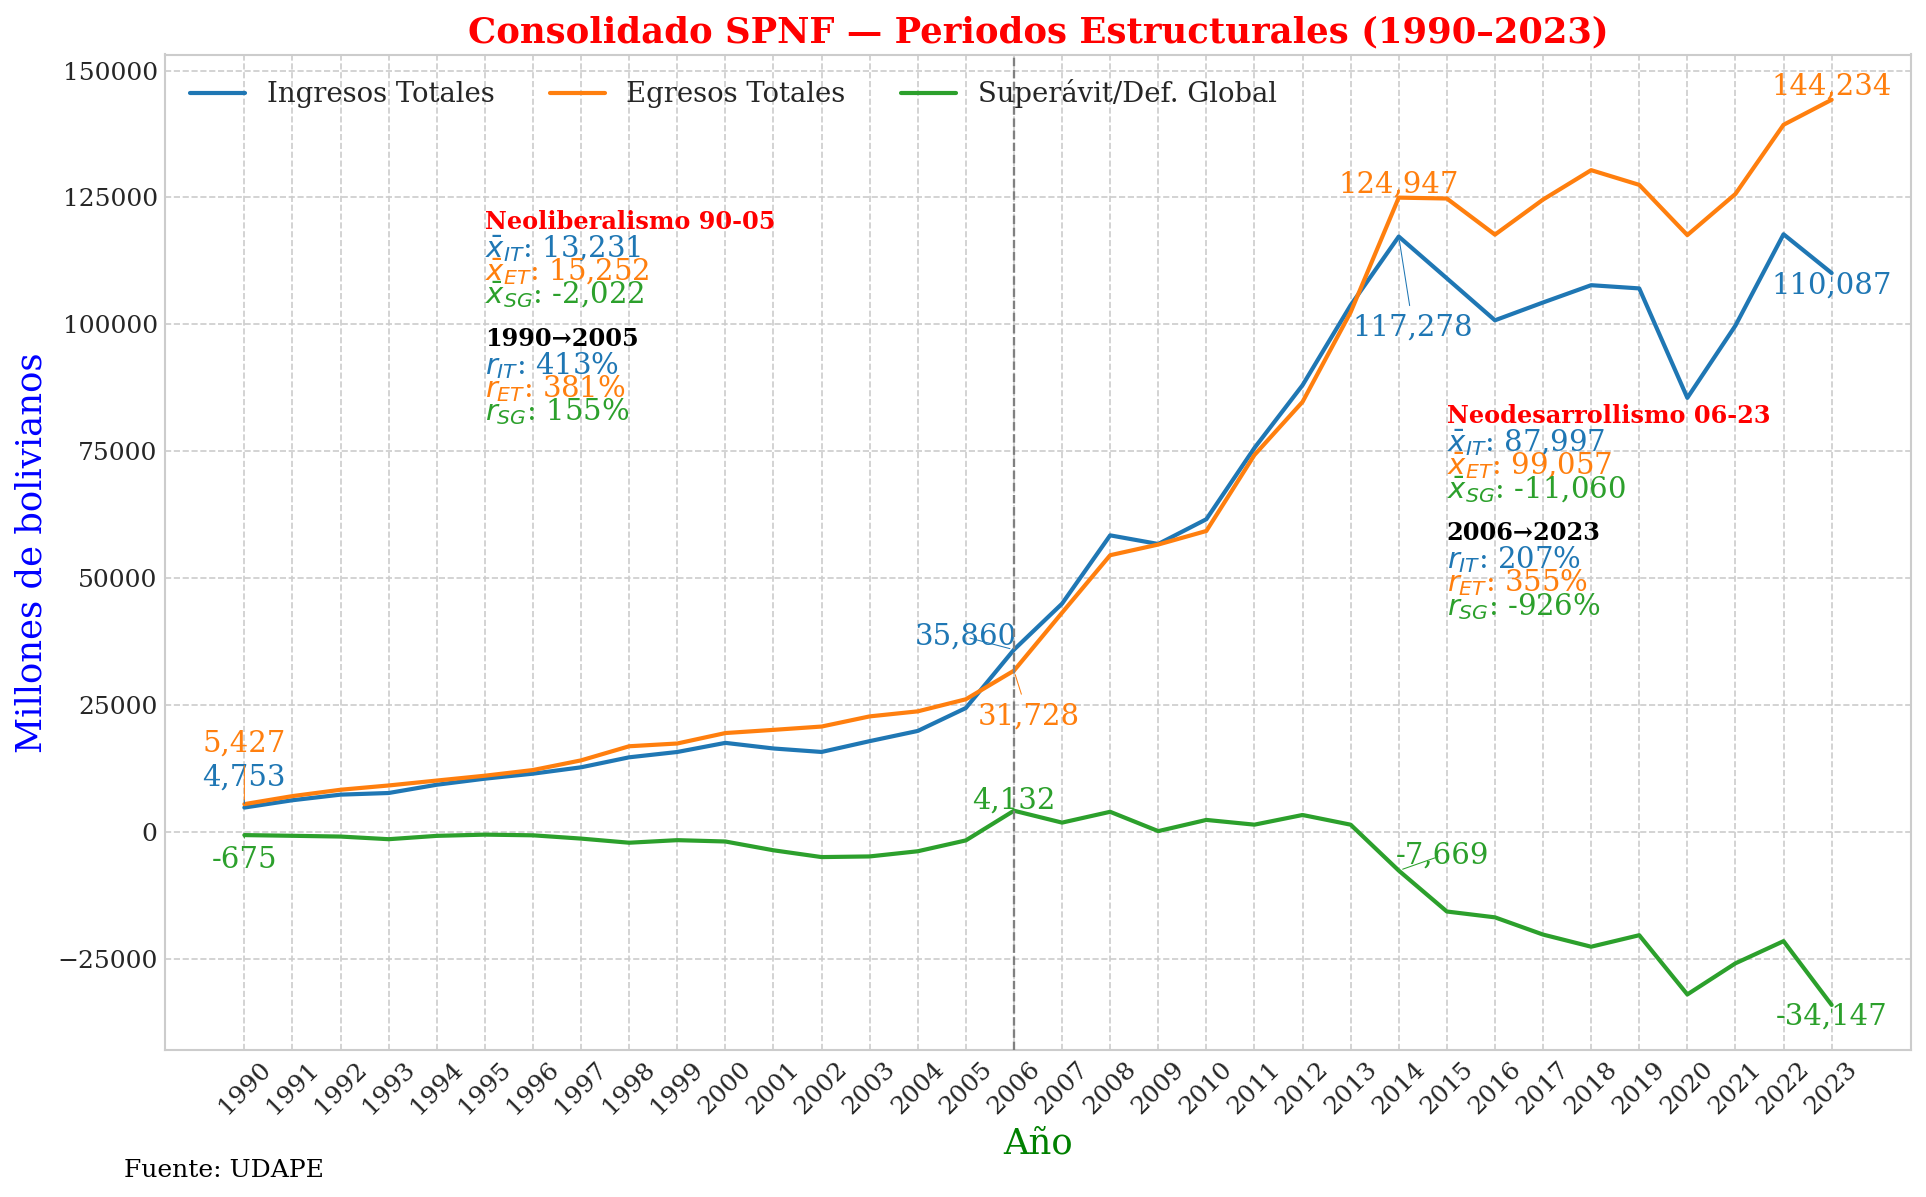

In [2]:
# ── 7. Gráfica 3: Periodos Estructurales ────────────────────────────────────
# Ajuste de años a anotar y ciclos nominales
annot_years_periodos = adjust_annot_years(df, annot_years_periodos)
annot_years_periodos.append(2014)
cycles_periodos = adjust_cycles(df, CYCLES_PERIODOS)

# Estadísticas de medias por ciclo (usadas en add_cycle_means_multi)
cycle_stats_periodos = {
    name: df.loc[period, cols_componentes].mean().to_dict()
    for name, period in cycles_periodos.items()
}

# Ajuste de periodos nominales para las tasas de crecimiento
periodos_periodos = adjust_periods(df, periodos_tasas_periodos)

# Offsets específicos para esta gráfica
hitos_offsets_periodos        = hitos_offsets         # del bloque 5
annotation_offsets_periodos = {
    "ingresos_totales": {
        1990: (0, 6000),
        2006: (-1,  2500),
        2014: (0.3,  -18000),
        2023: (0,  -2500),
    },
    "egresos_totales": {
        1990: (0, 12000),
        2006: (0.3, -9000),
        2014: (0,  2500),
        2023: (0, 2500),
    },
    "sup_o_def_global": {
        1990: (0, -5000),
        2006: (0,   2000),
        2014: (0.9,   3000),
        2023: (0,  -2300),
    }
}

medias_offsets_periodos = {
    "Neoliberalismo 90-05": ( 1995, 0.8 ),  # (1995, 0.75)
    "Neodesarrollismo 06-23": ( 2015, 0.55 ),  # (2015, 0.40)
}

tasas_offsets_periodos = {
    "1990-2005":          ( 1995, 0.65 ),  # → (1995, 0.87)
    "2006-2023":          ( 2015, 0.40 ),  # → (2015, 0.87)
}


# Inicializar figura y ejes
fig, ax = init_base_plot(
    df=df,
    series=componentes,
    colors=colors,
    title=f"Consolidado SPNF — Periodos Estructurales ({df.index[0]}–{df.index[-1]})",
    xlabel="Año",
    ylabel="Millones de bolivianos",
    source_text="Fuente: UDAPE"
)

# 1) Líneas de hitos verticales
add_hitos(
    ax,
    df.index,
    hitos_v_periodos,
    hitos_offsets_periodos
)

# 2) Cajas de medias por ciclo
add_cycle_means_multi(
    ax,
    cycle_stats_periodos,
    medias_offsets_periodos,
    abbr,
    colors,
    line_spacing=ax.get_ylim()[1] * 0.03
)

# 3) Anotaciones de valores por año
add_year_value_annotations(
    ax,
    df,
    annot_years_periodos,
    cols_componentes,
    annotation_offsets_periodos,
    colors,
    arrow_lw=0.5
)

# 4) Tasas de crecimiento por periodo
add_period_growth_annotations_multi(
    ax,
    df,
    periodos_periodos,
    cols_componentes,
    tasas_offsets_periodos,
    colors,
    abbr
)

# Guardar y mostrar
fig.savefig(os.path.join(output_dir, "consolidado_spnf_periodos.png"))
plt.show()
plt.close(fig)


In [3]:
print(cycles_periodos)

{'Neoliberalismo 90-05': slice(1990, 2005, None), 'Neodesarrollismo 06-23': slice(2006, 2023, None)}
